Support Vector Machine (SVM)
==



Temas a desarrollar:

* Reglas de decisión, o mejor, Cotas de decisión
* Aproximación por la calle más ancha
* Kernels



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## Repaso : Multiplicadores de Lagrange

### Motivación
El método de multiplicadores de Lagrange, es uno de los métodos más utilizados para optimización sujeta a restricciones.

<img src="imgs/lagrange2d.gif" width=300 height=300 align="left"/>
Supongamos que se busca encontrar el máximo (o el mínimo) de una función $f(\mathbf{x})$ con $\mathbf{x}=[x_1, ..., x_n]^T$ (ver la figura), entonces debemos encontrar $\mathbf{x}_s$ tal que se cumpla

$$ \nabla_\mathbf{x} f(\mathbf{x}_s) = 0$$


Ahora, bien encontrar el valor de la solución $\mathbf{x}_s$ no es simple. Se puede partir desde una coordenada $\mathbf{x}_0$ y avanzar hasta encontrar en forma exploratoria a $\mathbf{x}_s$. Este método no es muy eficiente. Una mejor solución es emplear el método del gradiente descendente hasta llegar a la solución. 

Pero, si hubiera alguna condición que se deba cumplir, es decir, alguna restricción sobre los valores que pudiera tomar $\mathbf{x}_s$, por ejemplo, $g_1(\mathbf{x}_s) = c_1$ con $c_1=cte$, entonces los caminos para buscar el mínimo se reducen, ya que, el camino está definido por la condición (curva azul en la figura). En el caso de la condición de la figura encontraremos dos máximos y un mínimo. 

Siguiendo el ejemplo de la figura, los máximos y mínimos que se determinan no son los absolutos de la función, son máximos y mínimos de la función bajo las restricciones que impone $g_1(\mathbf{x})=c_1$.

Si se agregaría una condición más, $g_2(\mathbf{x})=c_2$, entonces los puntos $\mathbf{x}_s$ a determinar se encontrarán en la intersección entre las dos condiciones. Se imaginar 4 puntos de intersección en el ejemplo. Entonces la decisión sobre cuál es el máximo y mínimo se buscará entre esos 4 puntos. Es decir, cada condición implica una pérdida de dimensión.  

### Método de multiplicadores de Lagrange

#### Enunciado.

Si una función $f:\mathbb{R}^n \rightarrow \mathbb{R} : f(x_1, x_2, ..., x_n)$ tiene un extremo relativo cuando está sometida a $m$ restricciones:

$$g_1(x_1, ..., x_n)=0, ..., g_m(x_1, ..., x_m)=0 \label{eq:restricciones} $$

siendo $m<n$, existen entonces $m$ escalares $\lambda_1, \lambda_2, ..., \lambda_m$ tales que:

$$ \nabla f = \lambda_1 \nabla g_1 + \lambda_2 \nabla g_2 + ...+ \lambda_m g_m $$

#### ¿Qué significa?

No se va a demostrar el método de multiplicadores de Lagrange, no obstante se exponen algunas pautas sobre su aplicación, principalmente a optimización.

Si el problema busca determinar los extremos de la función $f(\mathbf{x})$, con $\mathbf{x} =[x_1, x_2, ..., x_n]^T$, en un problema configurado con restricciones, de acuerdo a la ec. \ref{eq:restricciones}, podemos definir una función $\mathcal{L}:\mathbb{R}^n \rightarrow \mathbb{R} : \mathcal{L}(\mathbf{x})$ como:

$$\mathcal{L}(x_1, ..., x_n, \lambda_1, ..., \lambda_m) = f(\mathbf{x}) + \sum_{i=1}^{m}{\lambda_i g_i(\mathbf{x})}$$

donde $f(\mathbf{x}) = \mathcal{L}(\mathbf{x}, \mathbf{\lambda})$ para aquellos $\mathbf{x}  ~|~  g_i(\mathbf{x})=0 ~ \forall ~  i\in \{1, ..., m\}$. Luego, buscamos los extremos de $\mathcal{L}$, que serán los extremos de $f$ restringidos por $g_i$:

$$ \nabla_{\mathbf{x}} \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) = \nabla f(\mathbf{x}) + \sum_{i=1}^{m}{\lambda_i \nabla g_i(\mathbf{x})} = 0 $$

$$ \nabla_{\mathbf{\lambda}} \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) =  [g_1(\mathbf{x}), ... ,g_m(\mathbf{x})]^T = [0, ..., 0]^T $$

Las ecuaciones anteriores implican un sistema de  $n+m$ ecuaciones con $n+m$ incógnitas. La resolución se simplifica en la medida que $m$ sea tal que reduzca los grados de libertad del conjunto solución.



# Support Vector Machine

### Motivación

<img src="imgs/01.png" width=300 height=300 align="left"/> <img src="imgs/02.png" width=300 height=300 align="left"/>  El problema de clasificación es encontrar el hiperespacio que permita separar muestras que pertenecen a dos clases diferentes. Los algoritmos, como el perceptrón, tanto el simple como el multicapa, ofrecen una solución, dentro de muchas posibles (ver figura izquierda). Algunas soluciones no son tan buenas como otras, por ejemplo, un hiperplano muy cerca de las muestras es muy propenso a clasificar incorrectamente. ¿Entonces, cuál de todos los posibles hiperplanos es el mejor? Support Vector Machine (SVM) busca de todas las soluciones, el hiperplano que proponga la **calle** más ancha (ver figura derecha). La **calle** queda definida por rectas paralelas al hiperplano que contienen las muestras más cercanas al hiperplano. Esas muestras se denominan el **soporte**.


 

## Condiciones fundamentales.

### Regla de decisión

<img src="imgs/03.png" width=300 height=300 align="left"/> El hiperplano de separación está definido, como siempre, por un vector ortogonal, en este caso, $\bar{w} \perp hiperplano$. A partir de este vector, podemos clasificar las puntos del espacio, como pertenecientes a una clase u otra. Para cualquier vector $\bar{u}$, se puede determina que se encuentra en un lado (+) del hiperplano si se cumple:

$$ \bar{w} \cdot \bar{u} \leq c $$

donde $(\cdot)$ es el producto escalar y $c$ es el parámetro que no dice cuándo la clase es (+), o negativa (-) en caso de ser $\bar{w} \cdot \bar{u} < c$. 

Sin perder generalidad, se puede definir la **Regla de decisión**.

$$\bar{w} \cdot \bar{u} + b \leq 0 ~ \implies ~ (+)\label{eq:I}$$

donde $ b = -c $. No se sabe todavía quién es $\bar{w}$ ni $b$, pero sí se conoce que $\bar{w}$ es ortogonal al hiperplano. 

$$$$

### Definición de la Calle

 Para construir la **calle** se puede definir que, siendo $\bar{x}_+$ y $\bar{x}_-$ muestras de entrenamiento de clases $(+)$ y $(-)$ respectivamente.Se define entonces:

$$ \bar w \cdot \bar x_+ + b \geq 1$$
$$ \bar w \cdot \bar x_- + b \leq -1$$

Ahora bien, para simplificar la matemática, se introduce una nueva variable, $y_i$ tal que 

$$ y_i = 1 ~~~ para ~~~ (+)$$
$$ y_i = -1 ~~~ para ~~~ (-)$$

luego, multiplicamos a ambos lados de la ecuación:

$$y_i \left ( \bar w \cdot \bar x_+ + b \right ) \geq y_i ~  1$$
$$y_i \left ( \bar w \cdot \bar x_- + b \right ) \leq y_i ~ -1$$

<img src="imgs/04.png" width=300 height=300 align="left"/> Se puede reescribir esta regla como una única ecuación:

$$y_i \left ( \bar w \cdot \bar x_+ + b \right ) \geq 1$$

donde la regla de decisión se realiza en base a que $y_i$ sea 1 o -1. También se puede escribir:

$$y_i \left ( \bar w \cdot \bar x_+ + b \right ) - 1 \geq 0$$

Y se obtiene finalmente la condición que deben cumplir las muestras que definen la **calle** o el **soporte** del hiperplano 

$$y_i \left ( \bar w \cdot \bar x + b \right ) - 1 = 0 ~~~ \implies ~~~ \bar x ~~~ en ~la~ calle \label{eq:II}$$

Quedan definidas, entonces, las cotas de decisión, según las (ec. \ref{eq:I}) y (ec. \ref{eq:II})


### Ancho de la calle

<img src="imgs/05.png" width=300 height=300 align="left"/>  Ahora se buscará que la calle sea la más ancha posible.

$$\bar D = \bar x_+ - \bar x_-$$

$$ A = \bar D \cdot \frac{\bar w}{\| \bar w \|}$$

$$ A = \left ( \bar x_+ - \bar x_- \right ) \cdot \frac{\bar w}{ \| \bar w \|}$$

pero, considerando (ec. \ref{eq:II}), donde $y_i = 1$ con $\bar x_+$ e $y_i = -1 $ con $\bar x_-$, se tiene

$$ \bar x_+ \cdot \bar w = 1 - b$$

$$ - \bar x_- \cdot \bar w = 1 + b$$

por lo tanto

$$A = \left ( 1 - b + 1 + b \right ) \frac{1}{\| \bar w \|} = \frac{2}{\| w \|}$$

y se quiere que $A = \max_{\bar w} \left ( \frac{2}{\| \bar w \| } \right )$ y eso depende de $\bar w$. Encontrar el máximo valor de $A$ equivale a encontrar el mínimo valor de $\| \bar w \|$, o bien:

$$ \bar w = \min_{\bar w} \left ( \frac{1}{2} \| \bar w \| ^2 \right ) \label{eq:III} $$

**Entonces se debe resolver la ecuación \ref{eq:III}, de acuerdo a las condiciones que impone (ec. \ref{eq:II}).**

## Solución 

Para encontrar la solución a la ecuación \ref{eq:III}, bajo las restricciones de la ec. \ref{eq:II}, se puede aplicar el *Método de Multiplicadores de Lagrange*, para ello definimos (ver el repaso):

$$ \mathcal{L}(\bar w, b) = \frac{1}{2} \| \bar w \|^2 - \sum_i \alpha_i \left( y_i (\bar w \cdot \bar x_i + b)-1\right) ~~~~con~\alpha_i \geq 0$$

Una cuestión importante es que $\mathcal{L}(\bar w,b)$ es convexa. Por lo tanto el mínimo se encuentra a partir de las derivadas parciales:

$$ \frac{\partial \mathcal{L}(\bar w, b)}{\partial \bar w} = \bar w - \sum_i \alpha_i y_i \bar x_i = \bar 0$$

se obtiene entonces:

$$\bar w = \sum_i \alpha_i y_i \bar x_i \label{eq:IV} $$

Esta última ecuación es importante, ya que no dice que $\bar w$ es una suma lineal de muestras $\bar x_i$, pero no de todas, sino de aquellas para las cuales $\alpha_i \not = 0$.

$$\frac{\partial \mathcal{L}(\bar w, b)}{\partial b} = \sum_i \alpha_i y_i = 0 \label{eq:V}$$

esta última ecuación no servirá más adelante.

### Condiciones complementarias. Definición del Soporte.

Las restricciones que plante la ec.\ref{eq:II}, son condiciones complementarias del método de optimización, y es interesante ver qué aportan. Cada término restando de $\mathcal{L}(\hat w, b)$ indica que

$$ \forall i ~~~\alpha_i \left ( y_i (\bar w \cdot \bar x_i +b) - 1 \right ) = 0 $$

eso implica

$$ \alpha_i = 0 ~~~~~~~\lor ~~~~~~~ y_i (\bar w \cdot \bar x_i +b) - 1 = 0$$

considerando la ec. \ref{eq:IV}, los términos que aportan son aquellos para los cuales $\alpha_i \not = 0$, y por lo tanto los $\hat x_i $ que aportan a la definición de $\bar w$ son aquellos que cumplen:

$$ y_i (\bar w \cdot \bar x_i +b) = 1 $$

Tales vectores se llaman **vectores de soporte**

## Ejemplo:

In [2]:
# Ejemplo de https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

def ap_svm(X,y): # fit the model, don't regularize for illustration purposes
    # Parte relevante. SVC: Support Vector Classification.
    # Parmetro C: parámetro de regularización. Cuanto más grande menos muestras mal clasificadas se permiten
    #             durante el aprendizaje. C grande tiende a overfeating. C pequeños, pero no muy chicos, 
    #             generalizan bien.
    clf = svm.SVC(kernel='linear', C=1)
    clf.fit(X, y)
    
    plt.figure(figsize=(8,8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)  #<===== hiperplano de separación
   
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

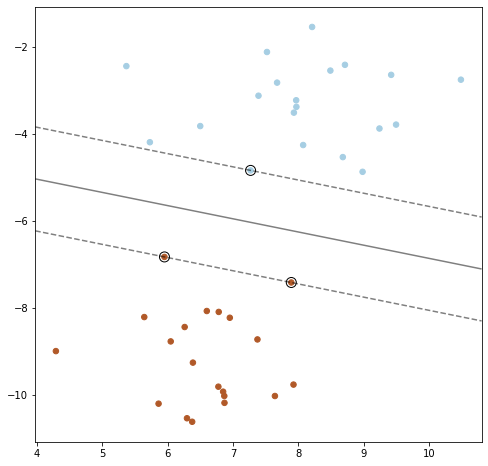

In [3]:
# we create 40 separable points
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
ap_svm(X,y)

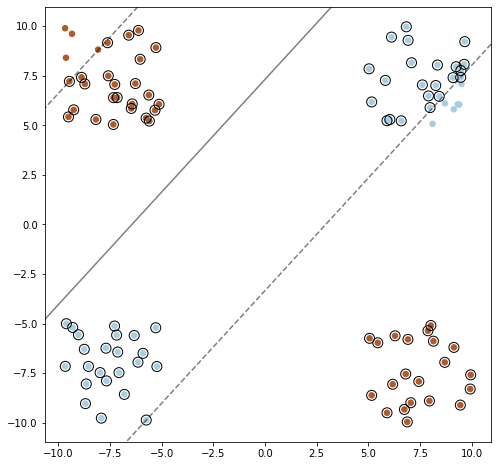

In [4]:
#XOR:
N=100
# Función XOR
xor_x = np.asarray([[-1,-1],[-1,1],[1,-1],[1,1]] )
xor_y = np.asarray([-1,1,1,-1])
aux = np.random.rand(N,2)*5+5
aux2 = np.random.choice(4,N)
XX=[]
y=[]
for i in range(len(aux2)):
    XX.append(xor_x[aux2[i]]*aux[i])
    y.append(xor_y[aux2[i]])
    
XOR_XX = np.asarray(XX)
XOR_y = np.asarray(y)


ap_svm(XOR_XX,XOR_y)

## Problema de optimización dual

SVM, planteado de esta manera, en principio posee un problema común con el perceptrón. Separa por hiperplanos, y por lo tanto no puede separar conjuntos que no sean linealmente separables. No obstante, con un poco de magia en la matemática, se pueden encontrar soluciones para tratar con este problema. De esto se tratan los Kernels.

Volviendo a considerar la solución dada por la ec. \ref{eq:IV}: $\bar w = \sum_i \alpha_i y_i \bar x_i$, podemos reescribir $\mathcal{L}(\bar w, b)$ 

$$ \mathcal{L}(\bar w, b) = \frac{1}{2} \| \bar w \|^2 - \sum_i \alpha_i \left( y_i (\bar w \cdot \bar x_i + b)-1\right) ~~~~con~\alpha_i \geq 0$$

como:

$$\mathcal{L}(\alpha_i,b) = \frac{1}{2} \left ( \sum_i \alpha_i y_i \bar x_i \right ) \cdot \left ( \sum_j \alpha_j y_j \bar x_j \right ) - \sum_i \alpha_i  y_i \bar x_i \cdot \left ( \sum_j \alpha_j y_j \bar x_j \right ) - \sum_i \alpha_i y_i b - \sum_i \alpha_i ~~~~con~\alpha_i \geq 0$$

incluyendo además la condición que surge en la búsqueda del óptimo, ec. \ref{eq:V}, se puede concluir:

$$\mathcal{L}(\alpha_i,b) = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j ~\alpha_i~\alpha_j~ y_i~y_j ~ (\bar x_i \cdot \bar x_j )$$

bajo la condición $\alpha_i \geq 0$ y $\sum_i \alpha_i y_i =0$.

Se puede observar que $\mathcal{L}(\alpha_i, b)$ depende linealmente del producto interno $(\bar x_i \cdot \bar x_j )$, y no directamente de $\bar x_i$ y $\bar x_j$. 

Volviendo a la ec. \ref{eq:I} sumando el resultado obtenido sobre el $\bar w$ óptimo, en la ec. \ref{eq:IV}, se puede reescribir la regla de decisión:

$$ \sum_i \alpha_i y_i (\bar x_i \cdot \bar u ) + b \geq 0 ~~~~ \implies ~~~~ (+) \label{eq:VI}$$

La regla de decisión de la ec. \ref{eq:VI} depende linealmente del producto interno $(\bar x_i \cdot \bar u )$, siendo $\bar u$ un elemento que se busca clasificar.


**NOTA: La clasificación depende linealmente del producto interno entre los vectores, es decir, depende linealmente de relaciones geométricas.**


## Kernels en SVM

### Existencia de una solución.

<img src="imgs/06.png" width=500 align="center"/> 

La función **XOR** es interesante como ejemplo, ya que no hay una forma de separar la clase **(+): 1** de la clase **(-): -1** (ver figura). La optimización dual determina una regla de decisión, ec. \ref{eq:VI}, donde importa la relación geométrica en la clasificación. Por lo tanto, puede pensarse en definir una función:

$$\Phi : \mathbb{X} \longrightarrow \mathfrak{h}$$

donde $\bar x, \bar u \in \mathbb{X}$ y $\mathfrak{h}$ es espacio de Hilbert (a los fines prácticos, un espacio con producto interno). 
Mediante la función $\Phi(\bar u)$ la muestra a clasificar $\bar u$ se "*mapea*" en un espacio de Hilber $\mathfrak{h}$ de mayor dimensión, posiblemente de dimensión infinita. En este caso, la regla de decisión será,

$$ \sum_i \alpha_i y_i (\Phi(\bar x_i) \cdot \Phi(\bar u) ) + b \geq 0 ~~~~ \implies ~~~~ (+) \label{eq:VI}$$

Entonces, encontrando una función $\Phi$ apropiada, algo que se abordará en breve, es posible obtener una solución. Este pase mágico posee un costo asociado. 

El problema de optimización empleando un producto interno $(\bar x \cdot \bar{x}^,)$ se resuelve en $O(n)$, pero al aplicar  $\Phi : \mathbb{X} \longrightarrow \mathfrak{H}$, existe un incremento en la dimensionalidad, el problema se resuleve en $O\left(dim(\mathfrak{h})\right)$, donde en general

$$O\left(dim(\mathfrak{h})\right) \gg O(n)$$

con la posibilidad de $dim(\mathfrak{h})=\infty $. De todas formas, nuevamente, no importa realmente la función $\Phi$, importa el producto interno a partir de la función $\Phi$: 

$$ K(\bar x, \bar x ^,) = \Phi(\bar x) \cdot \Phi(\bar x ^,)$$ 

que debe cumplir, en principio, ser un productor interno. Esta estructura es lo que definimos como **kernel**.

### Definición de Kernel.

Una función $K: \mathbb{X} \times \mathbb{X} \longrightarrow \mathbb{R}$ es un **kernel** sobre $\mathbb{X}$, si existe algún mapeo $\Phi : \mathbb{X} \longrightarrow \mathfrak{h}$, donde $\mathfrak{h}$ es un espacio de Hilber, llamado también "*feature space*", tal que:

$$ \forall \bar x, \bar x ^, \in \mathbb{X} ~,~ K(\bar x , \bar x ^,) = \left (\Phi(\bar x) \cdot \Phi(\bar x ^,) \right )$$

Algunas consideraciones:

- No importa $\Phi(\bar x)$ en sí, ni importa encontrarla. Interesa que exista. Encontrarla, y sobre todo, aplicarla, es contraproducente desde el punto de vista computacional. 
- El kernel $K$ puede ser arbitrario. Es suficiente con que exista $Phi$.

para ello es suficiente que se cumpla el **Teorema de Mercer**. No se va a profundizar sobre el cumplimiento de este teorema, pero una consecuencia directa es que **el kernel $K(\bar x , \bar x ^,)$ sea definido no-negativo**.

#### Kernel simétrico definido no-negativo.

Un kernel $K: \mathbb{X} \times \mathbb{X} \longrightarrow \mathbb{R}$ se dice simétrico definido no-negativo si

$$ \forall \left \{ x_1, x_2, ... , x_m \right \} \subseteq \mathbb{X}, ~~la~matriz~~ {\bar K} = \left [ K(x_i , x_j) \right ] \in \mathbb{R}^{m \times m}  $$

es simétrica definida no-negativa, es decir,

$$  \bar K ~~ = ~~{ \bar K} ^ T$$

$$ \forall c \in \mathbb{R}^m ~~~~c^T \bar K c \geq 0 $$


## Ejemplo: Kernel Polinómico. Resolución XOR


Para una constante $c>0$, un kernel polinómico $K$ de grado $p \in \mathbb{N}$ se define como

$$ \forall ~ \bar x , \bar x ^, \in \mathbb{R}, ~~ K(\bar x , \bar x ^,) = (\bar x \cdot \bar x ^, + c)^d $$ 

donde, para el ejemplo, $\bar x = [x_1 , x_2]^T $ y $\bar x ^, = [x^,_1 , x^,_2]^T $.

Desarrollando para el ejemplo bidimensional, el kernel tiene la forma:

$$ K(\bar x , \bar x ^,) =( x_1 x_1^, + x_2 x_2^, + c)^2 $$

$$ K(\bar x , \bar x ^,) = x_1^2 {x_1^,}^2 + x_2^2 {x_2^,}^2 + c^2 + \sqrt{2}x_1 x_2 ~ \sqrt{2}~x_1^, x_2^, + \sqrt{2c}~x_1 ~ \sqrt{2c}~x_1^, + \sqrt{2c}~x_2 ~ \sqrt{2c}~x_2^, $$

$$ K(\bar x , \bar x ^, ) =  \begin{pmatrix} {x_1}^2  \\ {x_2}^2  \\ c \\ \sqrt{2}~x_1 x_2 \\ \sqrt{2c}~x_1 \\ \sqrt{2c}~x_2 \end{pmatrix} \cdot \begin{pmatrix} {x_1^,}^2  \\ {x_2^,}^2  \\ c \\ \sqrt{2}~x_1^, x_2^, \\\sqrt{2c}~x_1^,\\  \sqrt{2c}~x_2^, \end{pmatrix} $$

donde es clara la existencia de una función de  mapeo $\Phi: \mathbb{R}^2 \longrightarrow \mathbb{R}^6 $:

$$ \Phi \begin{pmatrix} x_1  \\ x_2 \end{pmatrix} = \begin{pmatrix} {x_1}^2  \\ {x_2}^2  \\ c \\ \sqrt{2}~x_1 x_2 \\\sqrt{2c}~x_1\\  \sqrt{2c}~x_2 \end{pmatrix} \label{eq:VII}$$



### Resolución:

La función $XOR$ se puede expresar mediante la siguiente clasificación

$$ \left \{ \begin{pmatrix} 1  \\ -1 \end{pmatrix}, \begin{pmatrix} -1  \\ 1 \end{pmatrix} \right \} ~~\longrightarrow y = 1~~~~~\left \{ \begin{pmatrix} 1  \\ 1 \end{pmatrix}, \begin{pmatrix} -1  \\ -1 \end{pmatrix} \right \} ~~\longrightarrow y = -1$$

<img src="imgs/07.png" width=300 align="left"/> 
El mapeo mediante dado por la función $\Phi$ (ec. \ref{eq:VII}) determina la siguiente clasificación en el espacio de features:

$$ \left \{ \begin{pmatrix} 1  \\ 1 \\ 1 \\ - \sqrt 2 \\ \sqrt 2 \\ - \sqrt 2 \end{pmatrix}, \begin{pmatrix} 1  \\ 1 \\ 1 \\ - \sqrt 2 \\ - \sqrt 2 \\ \sqrt 2 \end{pmatrix} \right \} ~~\longrightarrow y = 1 ~~~~~ \left \{ \begin{pmatrix} 1  \\ 1 \\ 1 \\ \sqrt 2 \\ \sqrt 2 \\ \sqrt 2 \end{pmatrix}, \begin{pmatrix} 1  \\ 1 \\ 1 \\ \sqrt 2 \\ - \sqrt 2 \\ -\sqrt 2 \end{pmatrix} \right \} ~~\longrightarrow y = -1$$


Entonces, observando las coordenadas 5 y 6, se puede observar que el problema es ahora linealmente separable, y por lo tanto se puede resolver (ver figura).

In [5]:
def ap2_svm(X,y):
    C = .1
    h = .02  # step size in the mesh

    clf = svm.SVC(kernel='poly', degree=2, C=C).fit(X, y)
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.figure(figsize=(8,8))
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    # plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()


/Users/ivan/Environment/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


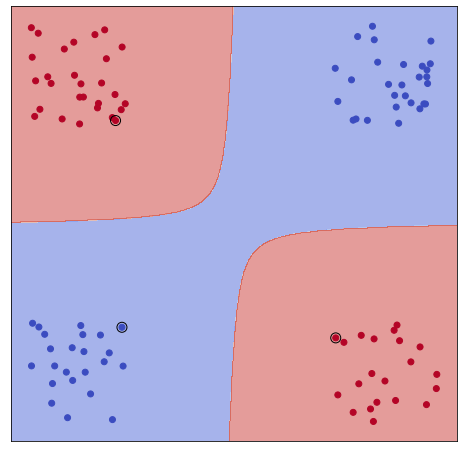

In [6]:
ap2_svm(XOR_XX,XOR_y)